<a href="https://colab.research.google.com/github/albey-code/hippoabstraction/blob/main/ROIs_HO_atlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I would like to explore both the **Harvard-Oxford** and the **Jülich atlas in Nilearn**. I want to understand which different options exist for the hippocampal formation, e.g., sub-ROIs and the probabilistic thresholds for the voxel.

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [124]:
#!pip install nilearn
from nilearn import datasets, plotting, image, masking
import numpy as np
import os

In [3]:
# Load the MNI template brain for visualisation
mni = datasets.load_mni152_template()

# Harvard-Oxford Atlas

The Harvard-Oxford (HO) atlas is an anatomical atlas derived from structural MRI data. It contains 48 cortical and **21 sub-cortical structural areas.** T1-weighted images of 21 healthy male and 16 healthy female subjects (ages 18-50) were individually segmented. The T1-weighted images were **affine-registered to MNI152 space.**

# Inspect the HO Atlas Docs.

Since the hippocampus is a sub-cortical structure, I will merely consider the `atlas_name` starting with **"sub-"** (see below). In addition, we are interested in a more conservative voxel probability threshold, e.g., 50 or above.

In [4]:
# Inspect the doc. for the Harvard-Oxford atlas
from nilearn.datasets import fetch_atlas_harvard_oxford
print(fetch_atlas_harvard_oxford.__doc__)

Load Harvard-Oxford parcellations from FSL.

    This function downloads Harvard Oxford atlas packaged from FSL 5.0
    and stores atlases in NILEARN_DATA folder in home directory.

    This function can also load Harvard Oxford atlas from your local directory
    specified by your FSL installed path given in `data_dir` argument.
    See documentation for details.

    .. note::

        For atlases 'cort-prob-1mm', 'cort-prob-2mm', 'cortl-prob-1mm',
        'cortl-prob-2mm', 'sub-prob-1mm', and 'sub-prob-2mm', the function
        returns a :term:`Probabilistic atlas`, and the
        :class:`~nibabel.nifti1.Nifti1Image` returned is 4D, with shape
        ``(182, 218, 182, 48)``.
        For :term:`deterministic atlases<Deterministic atlas>`, the
        :class:`~nibabel.nifti1.Nifti1Image` returned is 3D, with
        shape ``(182, 218, 182)`` and 48 regions (+ background).

    Parameters
    ----------
    atlas_name : :obj:`str`
        Name of atlas to load. Can be:
        "cort

In the cell above, for the **"sub-"** `atlas_name` s, we can see e.g., `"sub-maxprob-thr50-1mm"` or `"sub-prob-1mm"`. Importantly, there is a distinction between a *deterministic* and a *probabilistic* version of the HO atlas.

**Probabilistic**: for each voxel there is a probability for whether it belongs to an ROI. However, when visualising it, it looks wrong (the hippocampus is much more anterior than it should be *see* the **Probabilistic HO Atlas section**)!!

In [27]:
# Fetch the subcortical probabilistic atlas
ho_sub = datasets.fetch_atlas_harvard_oxford("sub-prob-1mm") #Replace by the other atlas_names to inspect ROIs (see below)

atlas_img = ho_sub.maps    # 4D probabilistic atlas
labels = ho_sub.labels     # list of region names
print(len(labels), labels[:22])

[fetch_atlas_harvard_oxford] Dataset found in /root/nilearn_data/fsl

22 ['Background', 'Left Cerebral White Matter', 'Left Cerebral Cortex', 'Left Lateral Ventricle', 'Left Thalamus', 'Left Caudate', 'Left Putamen', 'Left Pallidum', 'Brain-Stem', 'Left Hippocampus', 'Left Amygdala', 'Left Accumbens', 'Right Cerebral White Matter', 'Right Cerebral Cortex', 'Right Lateral Ventricle', 'Right Thalamus', 'Right Caudate', 'Right Putamen', 'Right Pallidum', 'Right Hippocampus', 'Right Amygdala', 'Right Accumbens']


`max-prob` is thresholded (at either 25 and 50), so it then looks like a **deterministic atlas** (binary mask: a voxel either belongs to an area or not)

In [60]:
# Load deterministic subcortical atlas (50% threshold)
ho_sub = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr50-1mm")

atlas_img = ho_sub.maps   # 3D NIfTI (voxels = label IDs)
labels = ho_sub.labels    # list of region names
print(len(labels), "labels")

[fetch_atlas_harvard_oxford] Dataset found in /root/nilearn_data/fsl

22 labels


In [6]:
for i, lab in enumerate(labels):
    print(i, lab)

0 Background
1 Left Cerebral White Matter
2 Left Cerebral Cortex
3 Left Lateral Ventricle
4 Left Thalamus
5 Left Caudate
6 Left Putamen
7 Left Pallidum
8 Brain-Stem
9 Left Hippocampus
10 Left Amygdala
11 Left Accumbens
12 Right Cerebral White Matter
13 Right Cerebral Cortex
14 Right Lateral Ventricle
15 Right Thalamus
16 Right Caudate
17 Right Putamen
18 Right Pallidum
19 Right Hippocampus
20 Right Amygdala
21 Right Accumbens


The Harvard-Oxford atlas comes in two resolutions (1 mm and 2 mm). We need to resample it to get the 3 mm isotropic voxel resolution we have in the functional Garvert et al. (2017) data (please note that we would have to resample even if the resolution matches, because other parameters, such as the window size can vary)
We decided to load it into 1 mm and not 2 mm because it enables better visualization.







# Probabilistic HO Atlas

In [ ]:
# Load atlas
ho_prob = datasets.fetch_atlas_harvard_oxford("sub-prob-1mm")

# Extract Left and Right Hippocampus
left_hipp = image.index_img(ho_prob.maps, 9)   #see cell above for the indices
right_hipp = image.index_img(ho_prob.maps, 19)

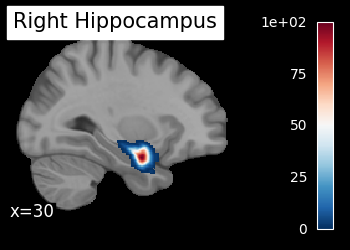

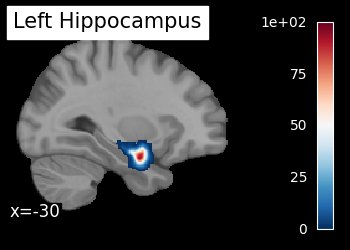

In [63]:
# Example: plot right hippocampus at different x positions
plotting.plot_stat_map(
    right_hipp, bg_img=mni,
    title="Right Hippocampus",
    display_mode="x", cut_coords=[30], threshold=0, vmax=100
)

# Example: plot left hippocampus at different x positions
plotting.plot_stat_map(
    left_hipp, bg_img=mni,
    title="Left Hippocampus", # For LH the coordinate is negative (-)!!
    display_mode="x", cut_coords=[-30], threshold=0, vmax=100
)

# Deterministic (Maxprob.) HO Atlas

See above in the docs. re the reasoning of choosing the `"sub-maxprob-thr50-1mm"` HO atlas version.

In [65]:
from nilearn import datasets, image, plotting

In [76]:
# Load deterministic atlas (maxprob, 50% threshold)
ho_det = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr50-1mm") #We decided this is the best option!
labels_det = ho_det.labels
det_img = ho_det.maps

# Find hippocampus indices
hipp_idxs = [i for i, lab in enumerate(labels_det) if "Hippocampus" in lab]
print("Hippocampus indices:", hipp_idxs, [labels_det[i] for i in hipp_idxs])

[fetch_atlas_harvard_oxford] Dataset found in /root/nilearn_data/fsl

Hippocampus indices: [9, 19] ['Left Hippocampus', 'Right Hippocampus']


In [77]:
# Hardcoded indices for hippocampus
LEFT_HIPP_IDX = 9    #Very important! Bonus info: they are the same indices as for the probabilistic HO atlas before!
RIGHT_HIPP_IDX = 19

In [80]:
# Create binary masks by hardcoding the indices
left_hipp_det = image.math_img("img == 9", img=det_img)
right_hipp_det = image.math_img("img == 19", img=det_img)

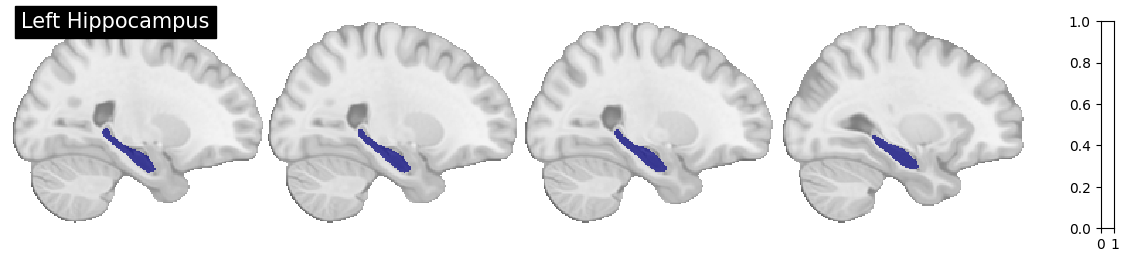

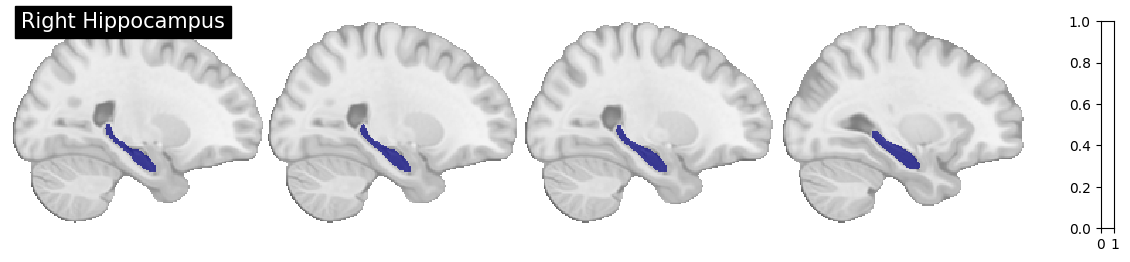

In [104]:
# Plot LH hippocampus at multiple sagittal slices
plotting.plot_roi(
    left_hipp_det, bg_img=mni,
    #view_type="contours",
    title="Left Hippocampus",
    display_mode="x", cut_coords=[-24, -25, -26, -30],  # try different slices
    draw_cross=False,
    black_bg=False,   # white background instead of black
    annotate=False    # removes x-coordinate text
)

# Plot RH hippocampus at multiple sagittal slices
plotting.plot_roi(
    right_hipp_det, bg_img=mni,
    #view_type="contours",
    title="Right Hippocampus",
    display_mode="x", cut_coords=[24, 25, 26, 30],      # try different slices
    draw_cross=False,
    black_bg=False,   # white background instead of black
    annotate=False   # removes x-coordinate text
)

plotting.show()

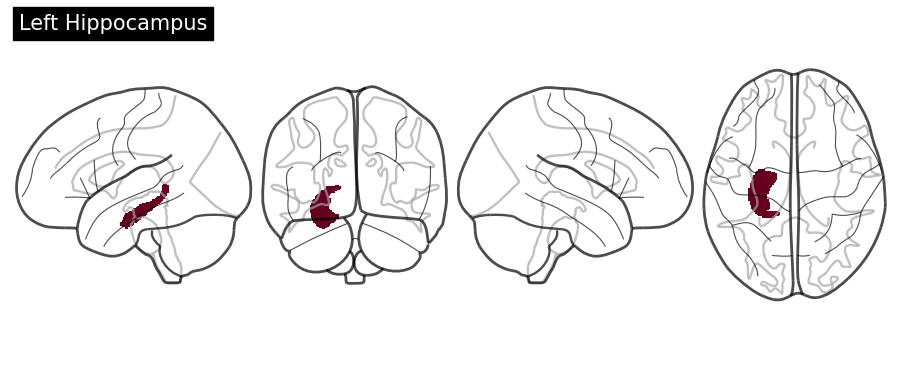

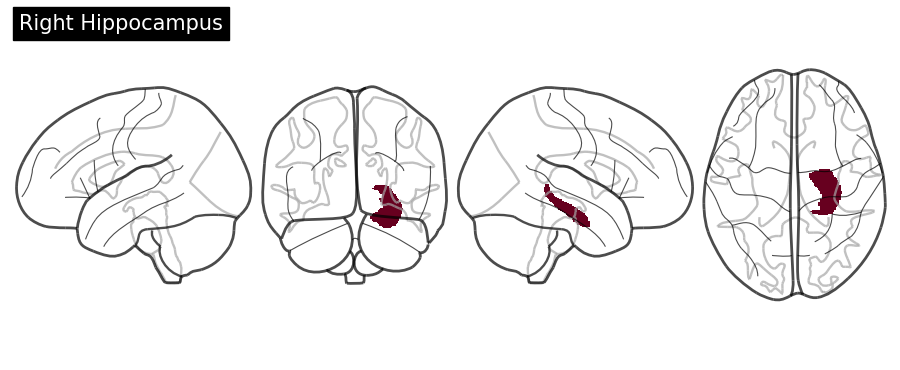

In [114]:
# Play around with Nilearn's glass brain settings, for visualisation only
plotting.plot_glass_brain(
    left_hipp_det,
    title="Left Hippocampus",
    display_mode="lyrz",  # sagittal, coronal, axial, 3D projections
    plot_abs=False,
    annotate=False,
    black_bg=False,
    threshold=0.5,
    colorbar=False
)

plotting.plot_glass_brain(
    right_hipp_det,
    title="Right Hippocampus",
    display_mode="lyrz",  # sagittal, coronal, axial, 3D projections
    plot_abs=False,
    annotate=False,
    black_bg=False,
    threshold=0.5,
    colorbar=False
)

# Define the Hippocampus ROI

**Extremely important!!** The functional MRI data by Garvert et al. (2017) is in 3mm isotropic voxel resolution. However, the MNI template brain AND the atlas are only in 1mm resolution, therefore I need to **RESAMPLE!!** before I apply this e.g., to the voxel reliability or further downstream analyses!!

In [116]:
# Define split coordinate
y_split = -21   # y=-21 is from Poppenk et al. (2013)

In [117]:
# Get affine to convert MNI → voxel indices
affine = left_hipp_det.affine
_, y_voxel, _, _ = np.linalg.inv(affine).dot([0, y_split, 0, 1])
y_voxel = int(round(y_voxel))
print("Split at voxel y =", y_voxel)

Split at voxel y = 105


In [118]:
# Function to split mask into anterior/posterior
def split_mask_y(mask_img, y_voxel):
    data = mask_img.get_fdata()
    affine = mask_img.affine

    # Posterior part (y <= y_voxel)
    post_data = np.zeros_like(data)
    post_data[:, :y_voxel, :] = data[:, :y_voxel, :]

    # Anterior part (y > y_voxel)
    ant_data = np.zeros_like(data)
    ant_data[:, y_voxel:, :] = data[:, y_voxel:, :]

    post_img = image.new_img_like(mask_img, post_data, affine)
    ant_img = image.new_img_like(mask_img, ant_data, affine)

    return ant_img, post_img

# Split left & right hippocampus
left_ant, left_post = split_mask_y(left_hipp_det, y_voxel)
right_ant, right_post = split_mask_y(right_hipp_det, y_voxel)

Now, I have 4 masks, namely: `left_ant`, `left_post`, `right_ant` and `right_post`

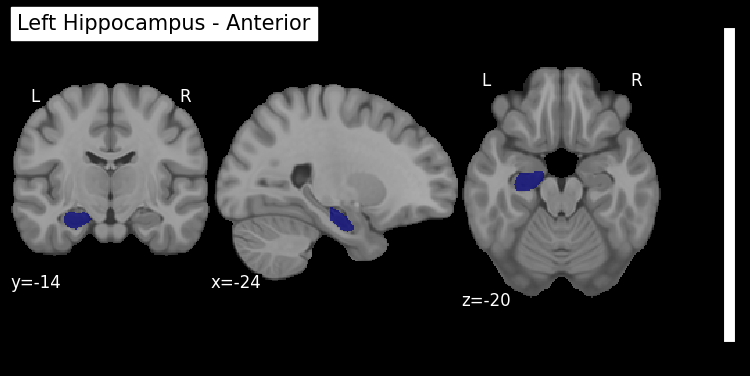

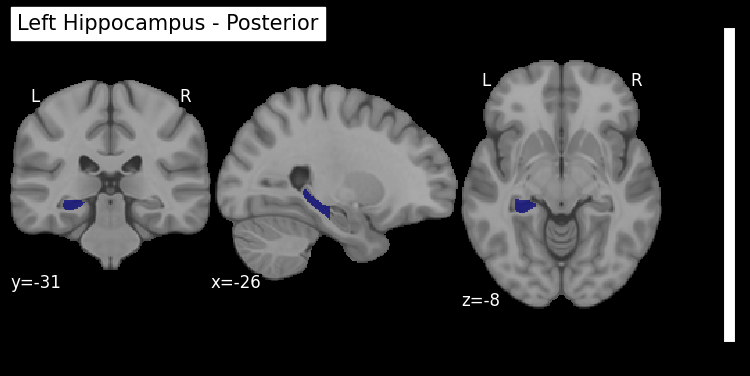

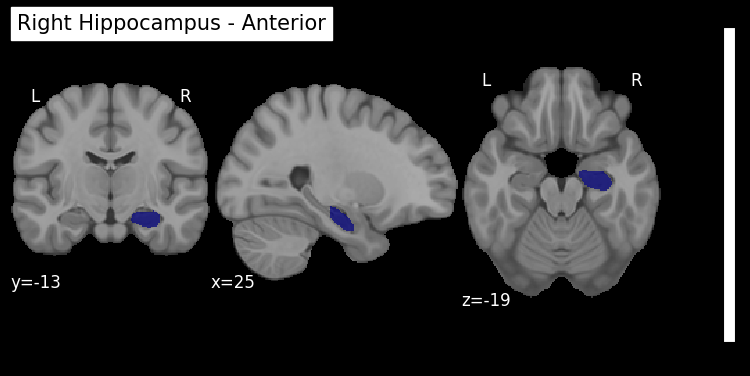

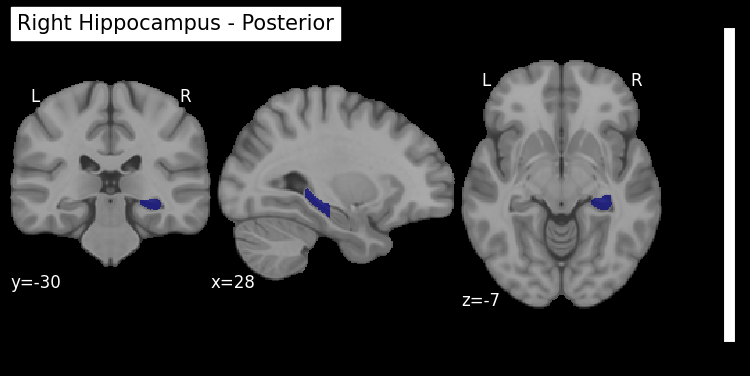

In [119]:
plotting.plot_roi(left_ant, bg_img=mni, title="Left Hippocampus - Anterior", draw_cross=False)
plotting.plot_roi(left_post, bg_img=mni, title="Left Hippocampus - Posterior", draw_cross=False)
plotting.plot_roi(right_ant, bg_img=mni, title="Right Hippocampus - Anterior", draw_cross=False)
plotting.plot_roi(right_post, bg_img=mni, title="Right Hippocampus - Posterior", draw_cross=False)

plotting.show()

In [120]:
# Example for left anterior hippocampus mask
print("Affine:\n", left_ant.affine)

# Extract voxel dimensions (absolute values of diagonal)
voxel_sizes = np.sqrt((left_ant.affine[:3, :3] ** 2).sum(axis=0))
print("Voxel sizes (mm):", voxel_sizes)

Affine:
 [[   1.    0.    0.  -91.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Voxel sizes (mm): [1. 1. 1.]


# Save the ROI masks

Save the ROI masks for later use in the voxel_reliability.ipynb's and for downstream analyses!

In [122]:
# Path to the ROI_masks folder in Google Drive
roi_dir = "/content/drive/MyDrive/ROI_masks"

In [125]:
# Save masks
left_ant.to_filename(os.path.join(roi_dir, "left_ant_HPC_1mm.nii.gz"))
right_ant.to_filename(os.path.join(roi_dir, "right_ant_HPC_1mm.nii.gz"))
left_post.to_filename(os.path.join(roi_dir, "left_post_HPC_1mm.nii.gz"))
right_post.to_filename(os.path.join(roi_dir, "right_post_HPC_1mm.nii.gz"))

print("Masks saved in:", roi_dir)

Masks saved in: /content/drive/MyDrive/ROI_masks


In [126]:
# Load masks into a dictionary
masks = {
    "left_ant": image.load_img(f"{roi_dir}/left_ant_HPC_1mm.nii.gz"),
    "right_ant": image.load_img(f"{roi_dir}/right_ant_HPC_1mm.nii.gz"),
    "left_post": image.load_img(f"{roi_dir}/left_post_HPC_1mm.nii.gz"),
    "right_post": image.load_img(f"{roi_dir}/right_post_HPC_1mm.nii.gz"),
}

print("Loaded masks:", list(masks.keys()))

Loaded masks: ['left_ant', 'right_ant', 'left_post', 'right_post']
